# Covid-19 Naive Bayes - OSUPR 

## Importing data

In [192]:
a = 3
a

3

If prefixed with "!", you are using linux terminal.

In [193]:
!ls /kaggle/input/covid19-dataset

'Covid Data.csv'


In [194]:
import pandas as pd

In [195]:
raw_data = pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")

In [196]:
raw_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [197]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [198]:
raw_data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [199]:
raw_data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


<Axes: xlabel='DIABETES'>

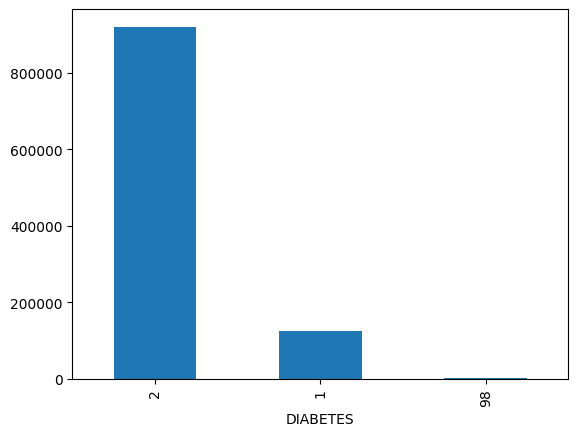

In [200]:
raw_data["DIABETES"].value_counts().plot.bar()

<Axes: xlabel='MEDICAL_UNIT'>

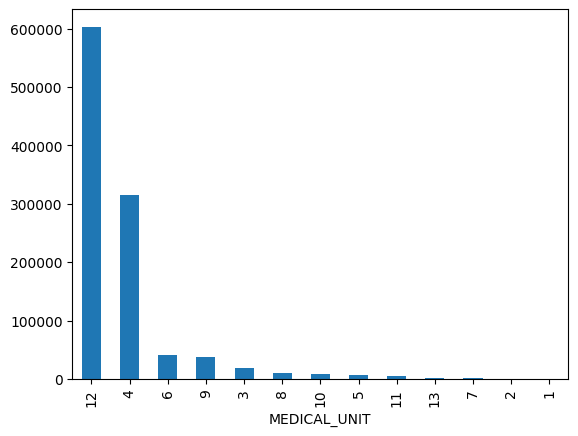

In [201]:
raw_data["MEDICAL_UNIT"].value_counts().plot.bar()

## Preparing data for modeling

In [202]:
data = raw_data

In [203]:
data["SURVIVED"] = data["DATE_DIED"] != "9999-99-99"

In [204]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,SURVIVED
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,True
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,True
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,True
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,True
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,True


In [205]:
columns_to_delete = ["DATE_DIED"]
data = data.drop(columns = columns_to_delete)
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,SURVIVED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,True
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,True
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,True
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,True
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,True


## Modeling

### Prepare data for modeling

In [206]:
Y = data["SURVIVED"]
X = data.drop(columns = "SURVIVED")
Y.head()

0    True
1    True
2    True
3    True
4    True
Name: SURVIVED, dtype: bool

In [207]:
X.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [208]:
from sklearn.model_selection import train_test_split

In [209]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=.2, random_state=42)

In [210]:
train_X

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
408561,2,9,2,1,97,2,62,97,1,2,2,2,2,2,1,2,2,1,5,97
70143,2,4,2,1,97,2,57,97,2,2,2,2,2,2,2,2,2,2,3,97
708782,2,12,1,1,97,2,34,2,2,2,2,2,2,2,2,2,2,2,6,97
572694,1,12,2,1,97,2,69,97,2,2,2,2,1,2,2,2,2,2,3,97
774181,2,12,1,2,2,2,59,2,2,2,2,2,2,2,2,2,2,2,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,4,1,1,97,2,43,2,2,2,1,2,2,2,2,2,2,2,7,97
365838,1,6,2,1,97,2,29,97,2,2,2,2,2,2,2,2,2,2,6,97
131932,2,4,2,1,97,2,38,97,2,2,2,2,2,2,2,2,2,1,3,97
671155,2,12,2,1,97,2,46,97,2,2,2,2,2,2,2,2,2,2,5,97


In [211]:
test_X

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
781974,2,12,1,1,97,2,35,2,2,2,2,2,2,2,2,2,2,2,7,97
937737,2,12,2,1,97,2,28,97,2,2,2,2,1,2,2,2,2,2,7,97
907828,2,12,1,1,97,2,7,2,2,2,2,2,2,2,2,2,2,2,7,97
784628,2,12,1,1,97,2,35,2,1,2,2,2,2,2,2,2,2,2,7,97
662460,2,12,1,1,97,2,33,2,2,2,2,2,2,2,2,2,2,2,5,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673443,2,12,2,1,97,2,42,97,2,2,2,2,2,2,2,2,2,2,5,97
656736,1,12,1,1,97,2,70,2,2,2,2,2,1,2,2,2,2,2,3,97
858501,2,12,1,1,97,2,34,2,2,2,2,2,2,2,2,2,2,1,7,97
617079,2,12,1,1,97,2,57,2,1,2,2,2,1,2,2,1,2,2,3,97


### Multinomial Naive Bayes

In [212]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [213]:
model.fit(train_X, train_Y)

MultinomialNB()

### Testing

In [214]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [215]:
pred_y = model.predict(test_X)
pred_y

array([False, False, False, ..., False, False, False])

In [216]:
accuracy_score(test_Y, pred_y)

0.8705671983406051

In [217]:
report = classification_report(test_Y, pred_y)
print(report)

              precision    recall  f1-score   support

       False       0.99      0.87      0.93    194475
        True       0.35      0.88      0.50     15240

    accuracy                           0.87    209715
   macro avg       0.67      0.88      0.71    209715
weighted avg       0.94      0.87      0.89    209715



In [218]:
confusion_matrix(test_Y, pred_y)

array([[169114,  25361],
       [  1783,  13457]])

### Artificial Neural Networks
- PyTorch
- Tensorflow -> Keras

Sequential == ANN

In [219]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sampled, Y_sampled = smote.fit_resample(train_X,train_Y)

In [220]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_sampled)
X_sampled = scaler.transform(X_sampled)
test_X = scaler.transform(test_X)

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [238]:
model = Sequential()
model.add(Input((20,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(95,activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(85,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [239]:
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
model.fit(X_sampled, Y_sampled, epochs=5)

Epoch 1/5
48573/48573 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - accuracy: 0.8994 - loss: 0.2718
Epoch 2/5
48573/48573 ━━━━━━━━━━━━━━━━━━━━ 97s 2ms/step - accuracy: 0.9186 - loss: 0.2222
Epoch 3/5
48573/48573 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.9202 - loss: 0.2178
Epoch 4/5
25692/48573 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.9216 - loss: 0.2149

In [ ]:
ann_predict = model.predict(test_X)
ann_predict

In [ ]:
ann_predict = ann_predict > 0.5
ann_predict

In [ ]:
acc = accuracy_score(test_Y, ann_predict)
acc

In [ ]:
class_rep = classification_report(test_Y,ann_predict)
print(class_rep)

In [ ]:
confusion_matrix(test_Y,ann_predict)